# Demo for the Pytorch version of 4DFlowNet

Load required package

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
import pandas as pd
import glob
import cv2

## Load the dataset (h5 files)

### Load datasets

In [18]:
f1 = h5py.File('aorta03_LR.h5', 'r')
f2 = h5py.File('aorta03_HR.h5', 'r')

### Show the keys in both low and high resolution dataset

In [19]:
print(f1.keys())
print(f2.keys())

<KeysViewHDF5 ['SNRdb', 'mag_u', 'mag_v', 'mag_w', 'mask', 'u', 'v', 'venc_u', 'venc_v', 'venc_w', 'w']>
<KeysViewHDF5 ['aorta_model', 'boundary_cond', 'mask', 'timeframe', 'u', 'u_max', 'v', 'v_max', 'w', 'w_max']>


In [32]:
np.array(f1['u']).shape

(1, 164, 44, 56)

### Load the image

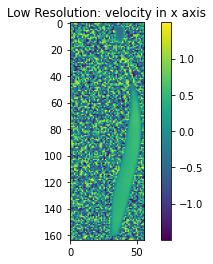

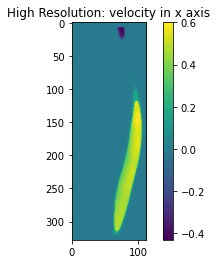

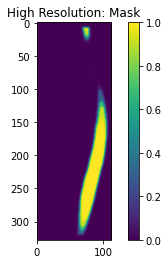

In [50]:
lr = np.array(f1['u'])
hr = np.array(f2['u'])
mask = np.array(f2['mask'])

plt.imshow(lr[0,:, 6])
plt.title("Low Resolution: velocity in x axis")
plt.colorbar()
plt.show()
plt.imshow(hr[0,:, 12])
plt.title("High Resolution: velocity in x axis")
plt.colorbar()
plt.show()
plt.imshow(mask[0,:, 12])
plt.title("High Resolution: Mask")
plt.colorbar()
plt.show()

### Segmentation mask of vessel

In [66]:
for i in range(5, 100, 5):
    threshold = i *0.01
    idx = np.where(mask >= threshold)
    
    print('threshold: {}, the proportion of positive samples: {}'.format(round(threshold, 2), 
                                                          round(np.count_nonzero(idx)/np.size(mask),3)))

threshold: 0.05, the proportion of positive samples: 0.221
threshold: 0.1, the proportion of positive samples: 0.205
threshold: 0.15, the proportion of positive samples: 0.198
threshold: 0.2, the proportion of positive samples: 0.191
threshold: 0.25, the proportion of positive samples: 0.186
threshold: 0.3, the proportion of positive samples: 0.18
threshold: 0.35, the proportion of positive samples: 0.174
threshold: 0.4, the proportion of positive samples: 0.169
threshold: 0.45, the proportion of positive samples: 0.165
threshold: 0.5, the proportion of positive samples: 0.163
threshold: 0.55, the proportion of positive samples: 0.16
threshold: 0.6, the proportion of positive samples: 0.155
threshold: 0.65, the proportion of positive samples: 0.15
threshold: 0.7, the proportion of positive samples: 0.144
threshold: 0.75, the proportion of positive samples: 0.14
threshold: 0.8, the proportion of positive samples: 0.136
threshold: 0.85, the proportion of positive samples: 0.13
threshold:

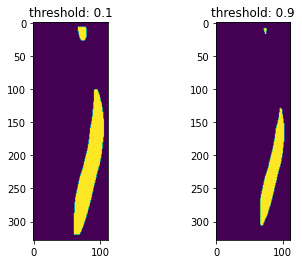

In [72]:
ax1 = plt.subplot(121)
ax1.set_title("threshold: 0.1")
ax1.imshow(np.where(mask >= 0.1, 1, 0)[0,:, 12])
ax2 = plt.subplot(122)
ax2.set_title("threshold: 0.9")
ax2.imshow(np.where(mask >= 0.9, 1, 0)[0,:, 12])

## Load the patch files after pre-processing

```
* Data: low resolution image, Input of the network
Patch image was processed by cropping and rotating according to the .csv file
shape: (6, 16, 16, 16) [pc-mra, mag, speed, vol_x, vol_y, vol_z]

* label: high resolution of the image, ground truth label
shape: (4, 16, 16, 16) [vol_x, vol_y, vol_z, mask]
```

In [4]:
# Input
data0 = np.load('data-0.npy')
data1 = np.load('data-1.npy')
data2 = np.load('data-10.npy')
print(data0.shape)

(6, 16, 16, 16)


In [6]:
# Ground Truth
label0 = np.load('label-0.npy')
label1 = np.load('label-1.npy')
label2 = np.load('label-10.npy')
print(label0.shape)

(3, 32, 32, 32)


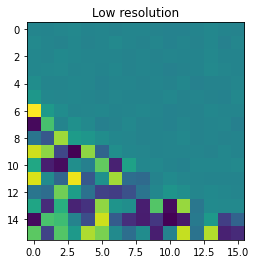

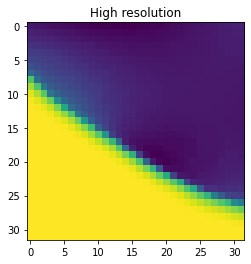

In [16]:
i =  15
plt.imshow(data2[4,:,i])
plt.title("Low resolution")
plt.show()
plt.title("High resolution")
plt.imshow(label2[0,:,2*i])
plt.show()

## Inference vs. Ground Truth

```
* data: inference image
* label: reference image
```

In [102]:
datax = np.load('pred_x.npy')
datay = np.load('pred_y.npy')
dataz = np.load('pred_z.npy')
labelx = np.load('lab_x.npy')
labely = np.load('lab_y.npy')
labelz = np.load('lab_z.npy')

### Compare the inference image with reference image

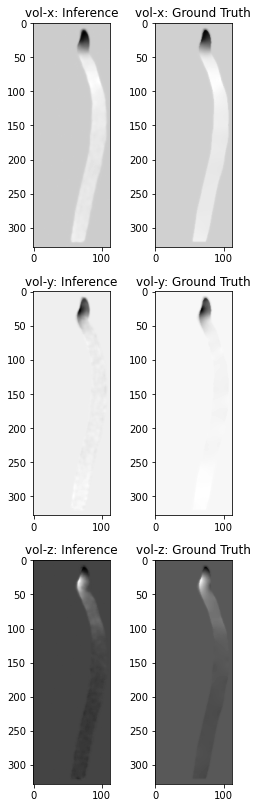

In [103]:
i = 21
plt.figure(figsize=(4,14))
ax1 = plt.subplot(321)
ax1.set_title("vol-x: Inference")
ax1.imshow(datax[0,:, i], cmap='gray')
ax2 = plt.subplot(322)
ax2.set_title("vol-x: Ground Truth")
ax2.imshow(labelx[0,:, i], cmap='gray')

ax3 = plt.subplot(323)
ax3.set_title("vol-y: Inference")
ax3.imshow(datay[0,:, i], cmap='gray')
ax4 = plt.subplot(324)
ax4.set_title("vol-y: Ground Truth")
ax4.imshow(labely[0,:, i], cmap='gray')

ax5 = plt.subplot(325)
ax5.set_title("vol-z: Inference")
ax5.imshow(dataz[0,:, i], cmap='gray')
ax6 = plt.subplot(326)
ax6.set_title("vol-z: Ground Truth")
ax6.imshow(labelz[0,:, i], cmap='gray')


### The difference between predicted and reference, compare with reference image

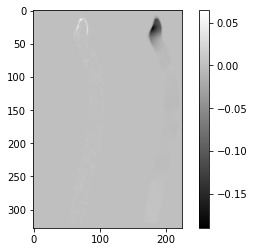

In [106]:
i = 22
diff = np.abs(datay[0,:, i]-labely[0,:, i])
comp_shape = list(diff.shape)
comp_shape[1] *= 2
comp = np.zeros(comp_shape)
# diff = np.where(diff<0.03, 0, 1)
comp[:,:diff.shape[1]] = diff
comp[:,diff.shape[1]:] = labely[0,:, i]
plt.imshow(comp, cmap='gray')
plt.colorbar()

### Relative speed error in each frame

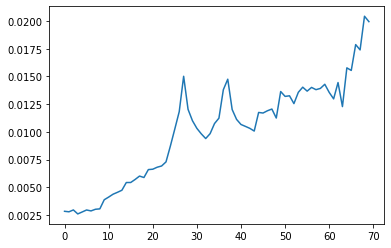

In [107]:
# Previous one
res = pd.read_csv('test.csv')
curf = res.values.reshape(-1)
plt.plot(curf)

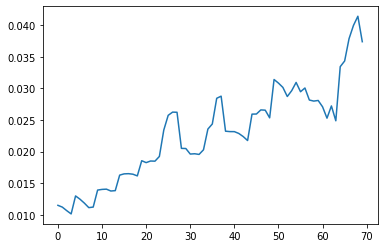

In [14]:
# The new one
res = pd.read_csv('../log/4DFlowNetV1_epoch_402_mask_0.1.csv')
curf = res.values.reshape(-1)
plt.plot(curf)

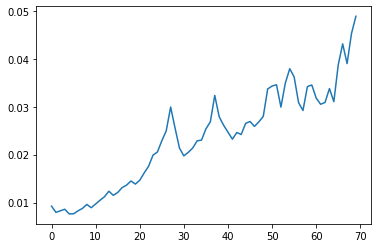

In [53]:
# The new one
res = pd.read_csv('../test_log/4DFlowSegV2_DICE_epoch_4002.csv')
curf = res.values.reshape(-1)
plt.plot(curf)

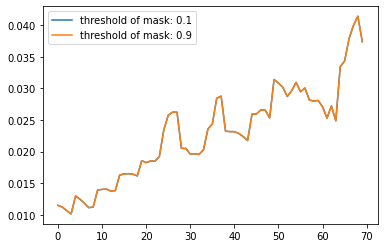

In [19]:
# mask_arr = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
mask_arr = [0.1, 0.9]
curf = []
for mask in mask_arr:
    res = pd.read_csv(f'../log/4DFlowNetV1_epoch_402_mask_{mask}.csv')
    curf.append(res.values.reshape(-1))
    plt.plot(curf[-1], label=f"threshold of mask: {mask}")
plt.legend()
plt.show()

### Shape of Mask

In [3]:
mask_path_list = sorted(glob.glob("./*-label-20.npy"))
mask_arr = []
for mask in mask_path_list:
    mask_arr.append(np.load(mask))

False


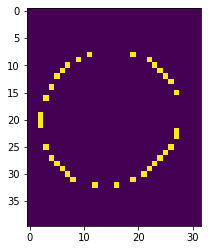

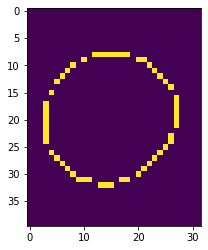

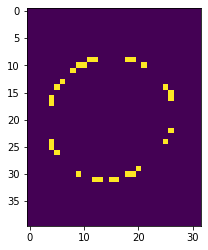

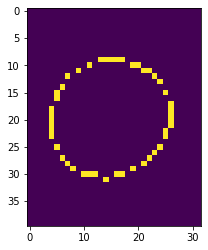

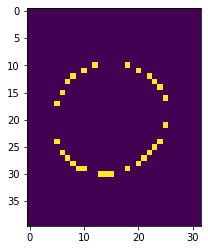

In [17]:
i = 160
print(np.all(mask[1]==mask[2]))
for j in range(1, len(mask_arr)):
    diff = (mask_arr[j][-1,i, :, :] - mask_arr[j-1][-1,i, :, :])
    plt.imshow(abs(mask_arr[j][-1,i, :, :] - mask_arr[j-1][-1,i, :, :])[0:40, 80:])
    plt.show()

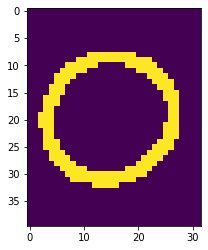

In [18]:
plt.imshow(abs(mask_arr[5][-1,i, :, :] - mask_arr[0][-1,i, :, :])[0:40, 80:])

### training log of FlowSeg

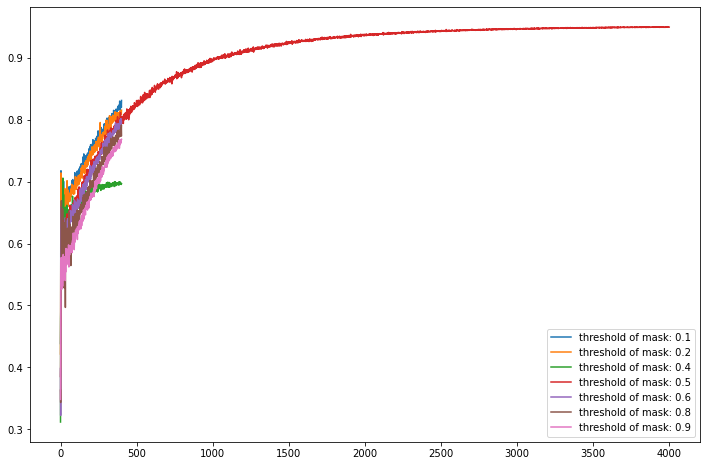

In [20]:
mask_arr = [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
# mask_arr = [0.1, 0.9]
plt.figure(figsize=(12, 8))
curf = []
for mask in mask_arr:
    res = pd.read_csv(f'../train_log/FlowSeg_lr0.0001_step10000_mask_{mask}_tanh_CE_V1.csv')
    curf.append(res["val_dice"].values.reshape(-1)[:])
    plt.plot(curf[-1], label=f"threshold of mask: {mask}")
plt.legend()
plt.show()

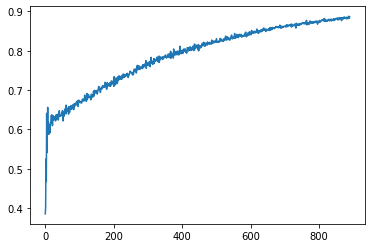

In [15]:
res = pd.read_csv(f'../train_log/FlowSeg_lr0.0001_step10000_mask_0.5_tanh_CE_V2.csv')
curf = []
curf.append(res["val_dice"].values.reshape(-1))
plt.plot(curf[-1], label=f"threshold of mask: {mask}")

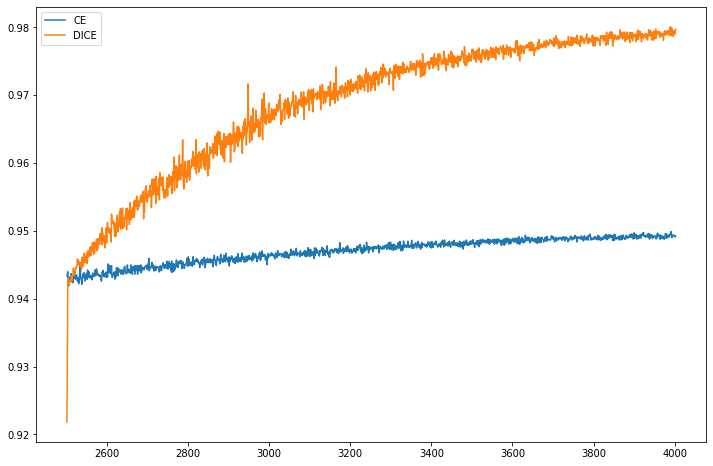

In [38]:
x = np.linspace(2502,4002,(4002-2502))
plt.figure(figsize=(12, 8))
res = pd.read_csv(f'../train_log/FlowSeg_lr0.0001_step8000_mask_0.5_tanh_CE_V2.csv')
curf = []
curf.append(res["val_dice"].values.reshape(-1)[2502:])
plt.plot(x, curf[-1], label=f"CE")
res = pd.read_csv(f'../train_log/FlowSeg_lr0.0001_step8000_mask_0.5_tanh_DICE_V2.csv')
curf.append(res["val_dice"].values.reshape(-1)[:])
plt.plot(x, curf[-1], label=f"DICE")
plt.legend()

In [50]:
line = os.popen("ps")

In [52]:
line.readlines()

['  PID TTY           TIME CMD\n',
 '50904 ttys000    0:00.14 -zsh\n',
 '45705 ttys001    0:00.06 -zsh\n',
 '45717 ttys001    0:21.57 /Users/htan/miniconda3/bin/python3.9 /Users/htan/miniconda3/bin/jupyter-notebook\n']